In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import losses 
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Dropout,AveragePooling2D
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

# Fonction pour charger les images et les étiquettes
def load_dataset(directory, label_encoder=None, img_size=(128, 128)):
    images = []
    labels = []

    for label in os.listdir(directory):
        class_path = os.path.join(directory, label)
        if not os.path.isdir(class_path):
            continue
        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)
            try:
                img = load_img(img_path, target_size=img_size)
                img = img_to_array(img)
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Erreur lors du chargement de {img_path} : {e}")

    images = np.array(images, dtype="float32") / 255.0
    labels = np.array(labels)

    if label_encoder is None:
        label_encoder = LabelEncoder()
        labels = label_encoder.fit_transform(labels)
    else:
        labels = label_encoder.transform(labels)

    return images, labels, label_encoder

# Chemins vers les dossiers
train_dir = "C:/Users/PC/Desktop/chest_xray/test"
test_dir = "C:/Users/PC/Desktop/chest_xray/train"
img_size = (128, 128)

# Chargement des datasets
x_train, y_train, le = load_dataset(train_dir, img_size=img_size)
x_test, y_test, _ = load_dataset(test_dir, label_encoder=le, img_size=img_size)

# Affichage des formes
print("Train :", x_train.shape, y_train.shape)
print("Test  :", x_test.shape, y_test.shape)


Train : (624, 128, 128, 3) (624,)
Test  : (5232, 128, 128, 3) (5232,)


In [3]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Taille des images
img_size = (128, 128)

# ================================
# Chargement des données TRAIN
# ================================
train_dir = "C:/Users/PC/Desktop/chest_xray/train"

x_train = []
y_train = []

for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                img = load_img(file_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0
                x_train.append(img_array)
                y_train.append(label)
            except Exception as e:
                print(f"Erreur avec {file_path} : {e}")

x_train = np.array(x_train, dtype="float32")
y_train = np.array(y_train)

# ================================
# Chargement des données TEST
# ================================
test_dir = "C:/Users/PC/Desktop/chest_xray/test"

x_test = []
y_test = []

for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                img = load_img(file_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0
                x_test.append(img_array)
                y_test.append(label)
            except Exception as e:
                print(f"Erreur avec {file_path} : {e}")

x_test = np.array(x_test, dtype="float32")
y_test = np.array(y_test)

# ================================
# Encodage des labels
# ================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)



In [4]:
x_train.shape

(5232, 128, 128, 3)

In [5]:
x_test.shape

(624, 128, 128, 3)

In [6]:
y_train_encoded.shape

(5232,)

In [7]:
train_images, test_images,train_labels, test_labels=train_test_split(x_train,y_train_encoded,test_size=0.2,random_state=42)

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear una instancia de ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.5,
    height_shift_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
)

 

def augment_images(X_train, y_train, num_augments=4):
    X_augmented = []
    y_augmented = []

    for i in range(len(X_train)):
        # Reshape 
        img = X_train[i].reshape((1,) + X_train[i].shape)
        
        # Generer les versiones augmenté
        augment_iter = datagen.flow(img, batch_size=1)
        for _ in range(num_augments):
            aug_img = next(augment_iter)[0]  
            X_augmented.append(aug_img)
            y_augmented.append(y_train[i])
    
    # 
    X_augmented = np.array(X_augmented)
    y_augmented = np.array(y_augmented)
    
    return X_augmented, y_augmented
# 
X_augmented, y_augmented = augment_images(train_images, train_labels, num_augments=4)

In [9]:
X_augmented.shape

(16740, 128, 128, 3)

In [10]:
# Combiner les images originales y augmentés
train_images = np.concatenate((train_images, X_augmented), axis=0)
train_labels = np.concatenate((train_labels, y_augmented), axis=0)

In [11]:
train_images.shape

(20925, 128, 128, 3)

In [12]:
train_images=train_images[:10000]
train_labels=train_labels[:10000]
train_images=train_images.astype('float32')
train_images = tf.image.resize(train_images, [224, 224]).numpy()
test_images = tf.image.resize(test_images, [224, 224]).numpy()

In [13]:
train_images.shape

(10000, 224, 224, 3)

In [14]:
train_labels=np.expand_dims(train_labels,axis=1)
test_labels=np.expand_dims(test_labels,axis=1)

In [15]:
print('Données entrainement :',train_images.shape)
print('Données test : ', test_images.shape)
## Variable cible
print('Cible entrainement  :',train_labels.shape)
print('Cible test : ', test_labels.shape)

Données entrainement : (10000, 224, 224, 3)
Données test :  (1047, 224, 224, 3)
Cible entrainement  : (10000, 1)
Cible test :  (1047, 1)


In [16]:
import numpy as np

# Corriger la forme des images
train_images = np.squeeze(train_images)  # enlève les dimensions inutiles
test_images = np.squeeze(test_images)
print(train_images.shape)
print(test_images.shape)

(10000, 224, 224, 3)
(1047, 224, 224, 3)


In [17]:
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l1, l2 


# 3. Charger VGG16 sans la partie classification (top), avec les poids ImageNet
base_model =ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 4. Geler les couches convolutionnelles
for layer in base_model.layers:
    layer.trainable = False

# 5. Ajouter le classifieur personnalisé
model = Sequential([ 
    base_model,

    layers.Flatten(),
    Dense(512, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),
    Dense(128, ),
    LeakyReLU (0.01), 
    BatchNormalization(),
    Dense(100,), 
    LeakyReLU(0.01),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64,), 
    LeakyReLU(0.001), 
    BatchNormalization(), 
    Dense(32), 
    LeakyReLU(0.001),
    layers.Dense(4, activation='softmax')
])
model.summary()


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 75,158,488 (286.71 MB)

 Trainable params: 51,568,656 (196.72 MB)

 Non-trainable params: 23,589,832 (89.99 MB)

In [18]:
optadam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optadam,
              loss="sparse_categorical_crossentropy",
              #losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])


In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=0.00001)

checkpoint_path = 'C:/Users/HP/Desktop/mellieur_Model/Panoo_model_Resnet50.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True,mode='max', verbose=1)

In [21]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Sauvegarde du modèle dans ton dossier projet
checkpoint = ModelCheckpoint(
    "C:/Users/PC/Desktop/projectflower/best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max"
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)

# Entraînement
history = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=100,
    validation_split=0.2,
    callbacks=[checkpoint, reduce_lr]
)


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.8926 - loss: 0.6891 

80/80 ━━━━━━━━━━━━━━━━━━━━ 1247s 15s/step - accuracy: 0.8926 - loss: 0.6889 - val_accuracy: 0.4810 - val_loss: 1.9049 - learning_rate: 0.0010
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.8981 - loss: 0.5877 

80/80 ━━━━━━━━━━━━━━━━━━━━ 1135s 14s/step - accuracy: 0.8981 - loss: 0.5875 - val_accuracy: 0.7765 - val_loss: 0.8989 - learning_rate: 0.0010
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1121s 14s/step - accuracy: 0.9108 - loss: 0.5042 - val_accuracy: 0.7605 - val_loss: 4.3488 - learning_rate: 0.0010
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9169 - loss: 0.4498 

80/80 ━━━━━━━━━━━━━━━━━━━━ 1103s 14s/step - accuracy: 0.9169 - loss: 0.4496 - val_accuracy: 0.8010 - val_loss: 0.7128 - learning_rate: 0.0010
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1064s 13s/step - accuracy: 0.9190 - loss: 0.4086 - val_accuracy: 0.3150 - val_loss: 1.7575 - learning_rate: 0.0010
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9206 - loss: 0.3724 
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
80/80 ━━━━━━━━━━━━━━━━━━━━ 1162s 15s/step - accuracy: 0.9207 - loss: 0.3723 - val_accuracy: 0.7615 - val_loss: 1.3547 - learning_rate: 0.0010
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1074s 13s/step - accuracy: 0.9304 - loss: 0.3348 - val_accuracy: 0.7650 - val_loss: 1.8944 - learning_rate: 2.0000e-04
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9455 - loss: 0.2931 
Epoch 8: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
80/80 ━━━━━━━━━━━━━━━━━━━━ 1142s 14s/step - accuracy: 0.9455 - loss: 0.2930 - val_

80/80 ━━━━━━━━━━━━━━━━━━━━ 1048s 13s/step - accuracy: 0.9596 - loss: 0.2580 - val_accuracy: 0.8710 - val_loss: 0.5312 - learning_rate: 8.0000e-06
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 556s/step - accuracy: 0.9510 - loss: 0.2647  

80/80 ━━━━━━━━━━━━━━━━━━━━ 44176s 559s/step - accuracy: 0.9510 - loss: 0.2646 - val_accuracy: 0.8815 - val_loss: 0.4588 - learning_rate: 8.0000e-06
Epoch 13/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 991s 12s/step - accuracy: 0.9533 - loss: 0.2666 - val_accuracy: 0.8770 - val_loss: 0.4563 - learning_rate: 8.0000e-06
Epoch 14/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1040s 13s/step - accuracy: 0.9601 - loss: 0.2575 - val_accuracy: 0.8775 - val_loss: 0.4345 - learning_rate: 8.0000e-06
Epoch 15/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9576 - loss: 0.2551

80/80 ━━━━━━━━━━━━━━━━━━━━ 926s 12s/step - accuracy: 0.9576 - loss: 0.2550 - val_accuracy: 0.8850 - val_loss: 0.4367 - learning_rate: 8.0000e-06
Epoch 16/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9598 - loss: 0.2532
Epoch 16: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
80/80 ━━━━━━━━━━━━━━━━━━━━ 944s 12s/step - accuracy: 0.9598 - loss: 0.2533 - val_accuracy: 0.8735 - val_loss: 0.4870 - learning_rate: 8.0000e-06
Epoch 17/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 887s 11s/step - accuracy: 0.9576 - loss: 0.2543 - val_accuracy: 0.8790 - val_loss: 0.4556 - learning_rate: 1.6000e-06
Epoch 18/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 966s 12s/step - accuracy: 0.9594 - loss: 0.2531 - val_accuracy: 0.8850 - val_loss: 0.4338 - learning_rate: 1.6000e-06
Epoch 19/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9610 - loss: 0.2438

80/80 ━━━━━━━━━━━━━━━━━━━━ 943s 12s/step - accuracy: 0.9609 - loss: 0.2438 - val_accuracy: 0.8885 - val_loss: 0.4228 - learning_rate: 1.6000e-06
Epoch 20/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9569 - loss: 0.2531

80/80 ━━━━━━━━━━━━━━━━━━━━ 938s 12s/step - accuracy: 0.9569 - loss: 0.2531 - val_accuracy: 0.8895 - val_loss: 0.4246 - learning_rate: 1.6000e-06


In [22]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy sur l\'ensemble de test :', test_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.9855 - loss: 0.2037
Accuracy sur l'ensemble de test : 0.9818528890609741


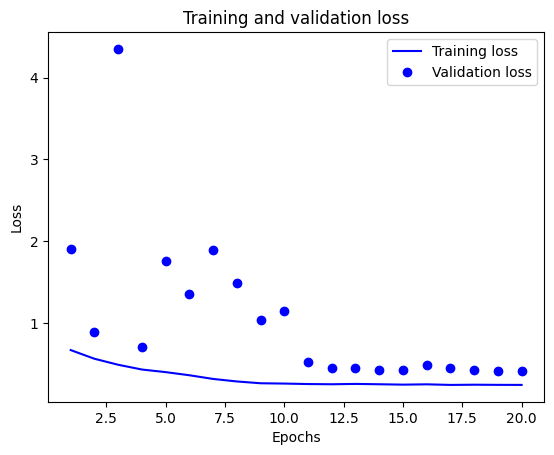

In [23]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "bo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

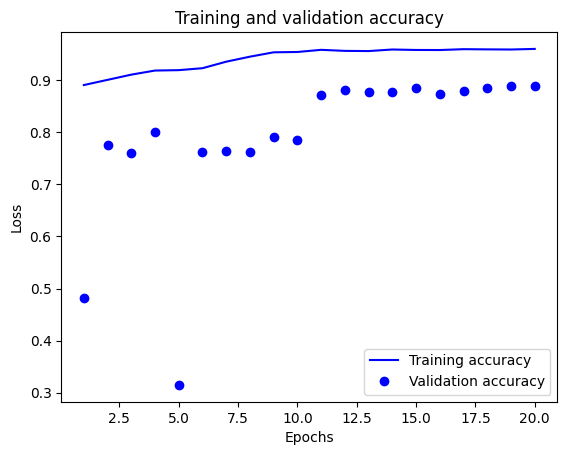

In [24]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training accuracy")
plt.plot(epochs, val_loss_values, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step
(1047,)
(1047, 1)
[0 0 1 ... 1 0 1]
***** confusion matric*****


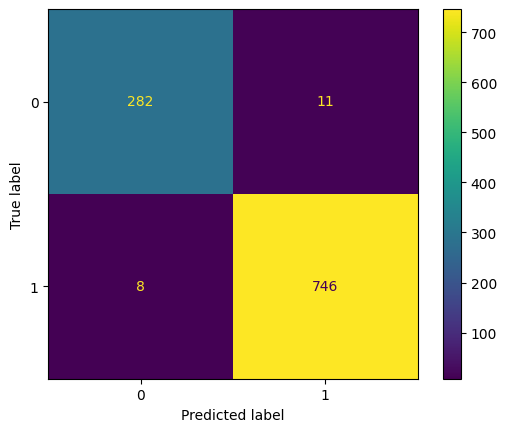

***** precision*****


0.9789413747551587

In [25]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# testing
predictions=model.predict(test_images)
y_pred= np.argmax(predictions, axis=1)
print(y_pred.shape)
print(test_labels.shape)
print(y_pred)

print("***** confusion matric*****")
cm = confusion_matrix(y_pred, test_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#precision global
print("***** precision*****")
precision_score(y_pred, test_labels,average='macro')